# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [237]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from datetime import datetime

hdf=pd.read_csv("kc_house_data_train.csv")
hdf.head()
hdf.reset_index(inplace=True)
hdf=hdf[['id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
hdf.set_index('id', inplace=True)

hdf['date']= pd.to_datetime(hdf['date'])

hdf.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [155]:
hdf.columns
house_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15', data=hdf).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2350.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:59:07   Log-Likelihood:            -2.3601e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17272   BIC:                         4.722e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.567e+06   3.33e+06      1.372      0.170   -1.96e+06    1.11e+07
bedrooms      -3.627e+04   2116.413    -17.137      0.000   -4.04e+04   -3.21e+04
bathrooms      4.126e+04   3700.592     11.150      0.000     3.4e+04    4.85e+04
sqft_living     114.2293      2.574     44.384      0.000     109.185     119.274
sqft_lot          0.1044      0.052      1.998      0.046       0.002       0.207
floors         5600.2941   4094.525      1.368      0.171   -2425.390    1.36e+04
waterfront     5.947e+05   1.93e+04     30.803      0.000    5.57e+05    6.33e+05
view           5.252e+04   2416.118     21.739      0.000    4.78e+04    5.73e+04
condition      2.627e+04   2670.585      9.835      0.000     2.1e+04    3.15e+04
grade          9.527e+04   2458.796     38.745      0.000    9.04e+04       1e+05
sqft_above       73.1256      2.578     28.366      0.000      68.073      78.179
sqft_basement    41.1030      3.008     13.663      0.000      35.206      47.000
yr_built      -2653.6616     82.565    -32.140      0.000   -2815.498   -2491.825
yr_renovated     17.4437      4.175      4.178      0.000       9.260      25.627
zipcode        -567.4119     37.523    -15.122      0.000    -640.962    -493.862
lat            6.021e+05   1.22e+04     49.222      0.000    5.78e+05    6.26e+05
long          -2.208e+05   1.49e+04    -14.830      0.000    -2.5e+05   -1.92e+05
sqft_living15    22.0718      3.929      5.618      0.000      14.371      29.773
sqft_lot15       -0.3200      0.082     -3.907      0.000      -0.481      -0.159
==============================================================================
Omnibus:                    15315.583   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731673.987
Skew:                           3.780   Prob(JB):                         0.00
Kurtosis:                      51.441   Cond. No.                     4.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.68e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

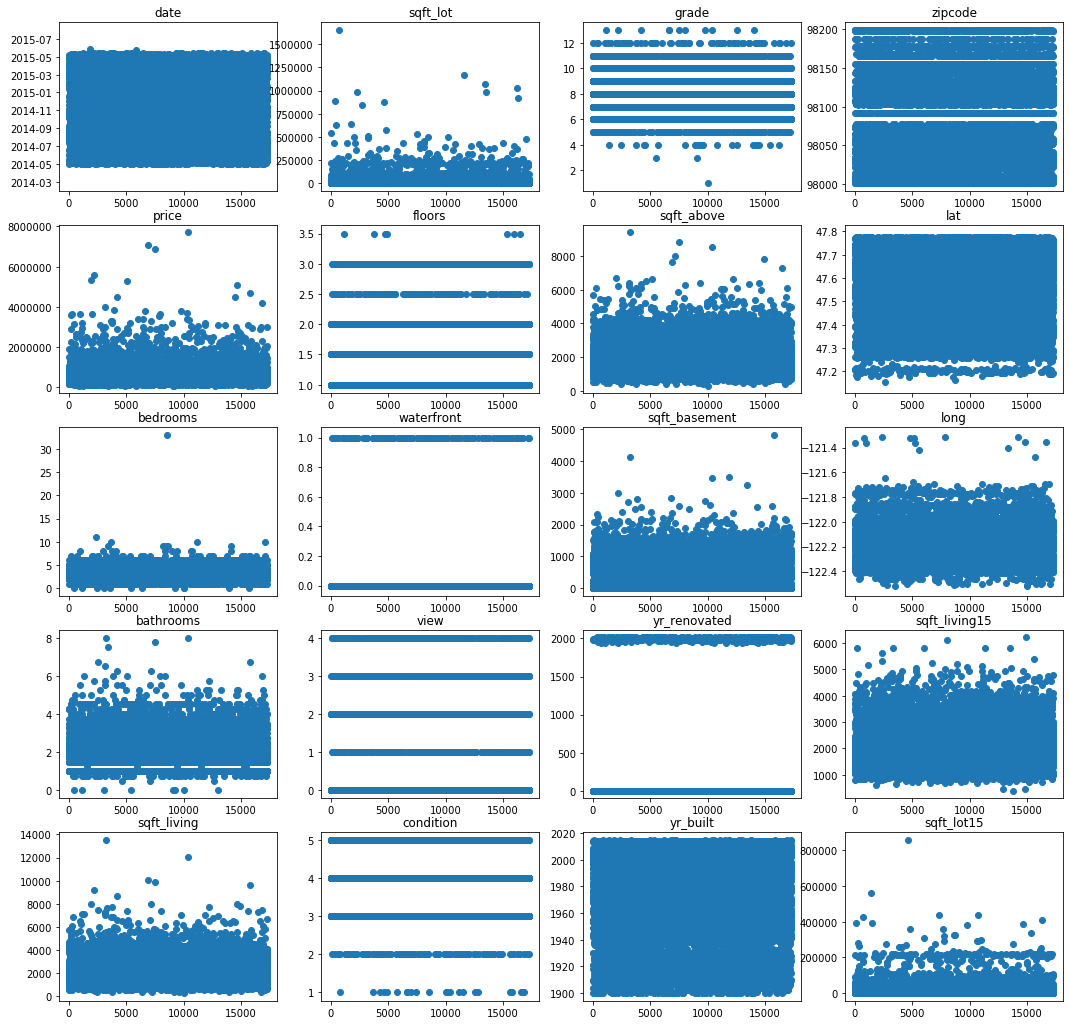

In [156]:
x=list(range(0,len(hdf.sqft_living)))

figure, ax = plt.subplots(5, 4, figsize=(18, 18))

ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Graph the four plots

ax[0][0].scatter(x, hdf.date)
ax[1][0].scatter(x, hdf.price)
ax[2][0].scatter(x, hdf.bedrooms)
ax[3][0].scatter(x, hdf.bathrooms)
ax[4][0].scatter(x, hdf.sqft_living)
ax[0][1].scatter(x, hdf.sqft_lot)
ax[1][1].scatter(x, hdf.floors)
ax[2][1].scatter(x, hdf.waterfront)
ax[3][1].scatter(x, hdf.view)
ax[4][1].scatter(x, hdf.condition)
ax[0][2].scatter(x, hdf.grade)
ax[1][2].scatter(x, hdf.sqft_above)
ax[2][2].scatter(x, hdf.sqft_basement)
ax[3][2].scatter(x, hdf.yr_renovated)
ax[4][2].scatter(x, hdf.yr_built)
ax[0][3].scatter(x, hdf.zipcode)
ax[1][3].scatter(x, hdf.lat)
ax[2][3].scatter(x, hdf.long)
ax[3][3].scatter(x, hdf.sqft_living15)
ax[4][3].scatter(x, hdf.sqft_lot15)

In [157]:

hdf.sqft_living = np.where(hdf.sqft_living<=5000, hdf.sqft_living, hdf.sqft_living.quantile([0.75]))
hdf.sqft_living15 = np.where(hdf.sqft_living15<=4000, hdf.sqft_living15, hdf.sqft_living15.quantile([0.75]))
hdf.sqft_lot = np.where(hdf.sqft_lot<=250000, hdf.sqft_lot, hdf.sqft_lot.quantile([0.75]))
hdf.sqft_lot15 = np.where(hdf.sqft_lot15<=230000, hdf.sqft_lot15, hdf.sqft_lot15.quantile([0.75]))
hdf.bedrooms = np.where(hdf.bedrooms<=10, hdf.bedrooms, hdf.bedrooms.quantile([0.75]))
hdf.bathrooms = np.where(hdf.bathrooms<=6, hdf.bathrooms, hdf.bathrooms.quantile([0.75]))

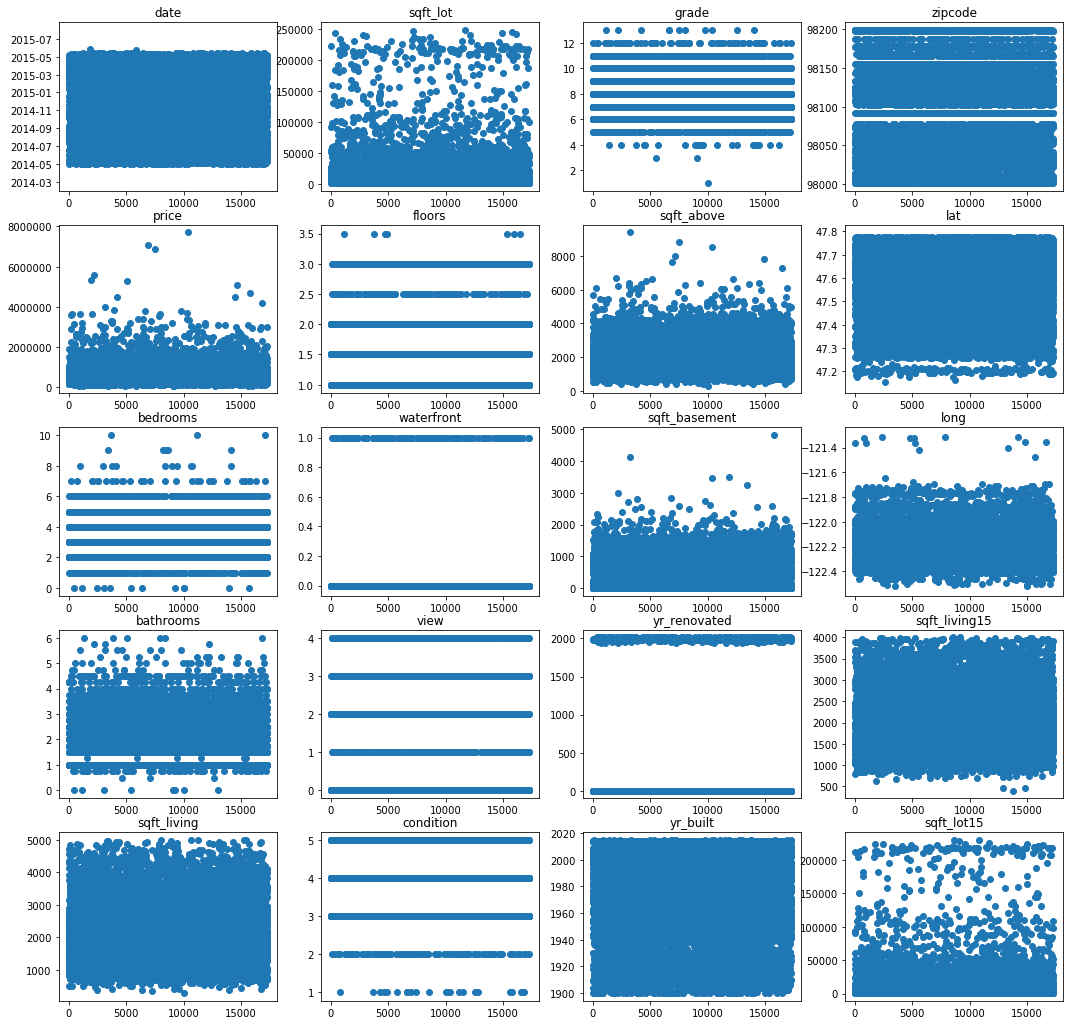

In [158]:
x=list(range(0,len(hdf.sqft_living)))

figure, ax = plt.subplots(5, 4, figsize=(18, 18))

ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Graph the four plots

ax[0][0].scatter(x, hdf.date)
ax[1][0].scatter(x, hdf.price)
ax[2][0].scatter(x, hdf.bedrooms)
ax[3][0].scatter(x, hdf.bathrooms)
ax[4][0].scatter(x, hdf.sqft_living)
ax[0][1].scatter(x, hdf.sqft_lot)
ax[1][1].scatter(x, hdf.floors)
ax[2][1].scatter(x, hdf.waterfront)
ax[3][1].scatter(x, hdf.view)
ax[4][1].scatter(x, hdf.condition)
ax[0][2].scatter(x, hdf.grade)
ax[1][2].scatter(x, hdf.sqft_above)
ax[2][2].scatter(x, hdf.sqft_basement)
ax[3][2].scatter(x, hdf.yr_renovated)
ax[4][2].scatter(x, hdf.yr_built)
ax[0][3].scatter(x, hdf.zipcode)
ax[1][3].scatter(x, hdf.lat)
ax[2][3].scatter(x, hdf.long)
ax[3][3].scatter(x, hdf.sqft_living15)
ax[4][3].scatter(x, hdf.sqft_lot15)

In [159]:
#sqft_living
#17290 data points-->172 at greater than 5000. top 1%
#hdf[hdf.sqft_living>5000].sqft_living.count()

#sqft_lot
#17290 data points-->84 at greater than 250000. top 0.4%
#hdf[hdf.sqft_lot>250000].sqft_lot.count()

#sqft_above
#17290 data points-->325 at greater than 4000. top 1.8%
#hdf[hdf.sqft_above>4000].sqft_above.count()

#sqft_living15
#17290 data points-->325 at greater than 4000. top 1.2%
#hdf[hdf.sqft_living15>4000].sqft_living15.count()

#sqft_lot15
#17290 data points-->325 at greater than 200000. top 0.8%
#hdf[hdf.sqft_lot15>200000].sqft_lot15.count()

#sqft_basement
#17290 data points-->74 at greater than 5000. top 0.4%
#hdf[hdf.sqft_basement>1900].sqft_basement.count()



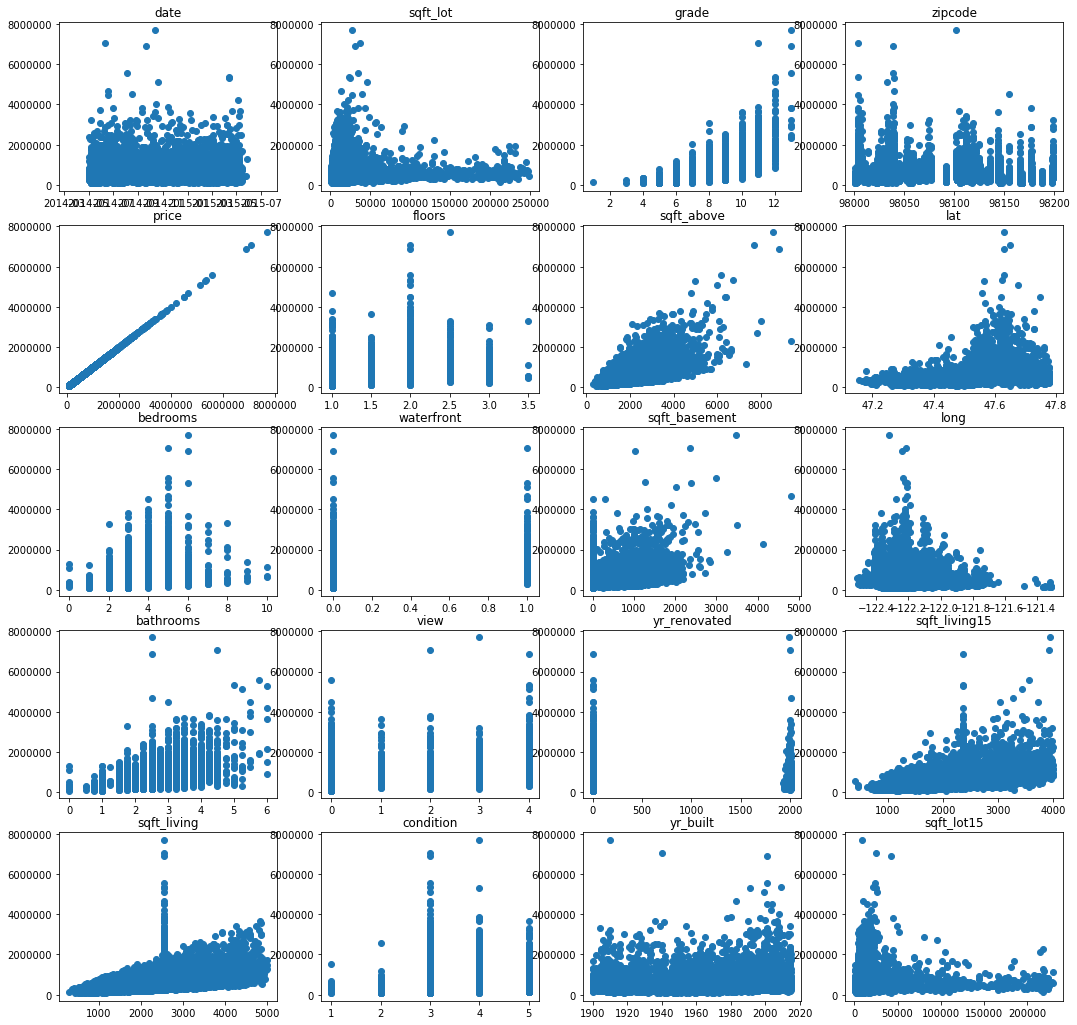

In [160]:
x=list(range(0,len(hdf.sqft_living)))

figure, ax = plt.subplots(5, 4, figsize=(18, 18))

ax[0][0].set_title('date')
ax[1][0].set_title('price')
ax[2][0].set_title('bedrooms')
ax[3][0].set_title('bathrooms')
ax[4][0].set_title('sqft_living')
ax[0][1].set_title('sqft_lot')
ax[1][1].set_title('floors')
ax[2][1].set_title('waterfront')
ax[3][1].set_title('view')
ax[4][1].set_title('condition')
ax[0][2].set_title('grade')
ax[1][2].set_title('sqft_above')
ax[2][2].set_title('sqft_basement')
ax[3][2].set_title('yr_renovated')
ax[4][2].set_title('yr_built')
ax[0][3].set_title('zipcode')
ax[1][3].set_title('lat')
ax[2][3].set_title('long')
ax[3][3].set_title('sqft_living15')
ax[4][3].set_title('sqft_lot15')

# Graph the four plots

ax[0][0].scatter(hdf.date, hdf.price)
ax[1][0].scatter(hdf.price, hdf.price)
ax[2][0].scatter(hdf.bedrooms, hdf.price)
ax[3][0].scatter(hdf.bathrooms, hdf.price)
ax[4][0].scatter(hdf.sqft_living, hdf.price)
ax[0][1].scatter(hdf.sqft_lot, hdf.price)
ax[1][1].scatter(hdf.floors, hdf.price)
ax[2][1].scatter(hdf.waterfront, hdf.price)
ax[3][1].scatter(hdf.view, hdf.price)
ax[4][1].scatter(hdf.condition, hdf.price)
ax[0][2].scatter(hdf.grade, hdf.price)
ax[1][2].scatter(hdf.sqft_above, hdf.price)
ax[2][2].scatter(hdf.sqft_basement, hdf.price)
ax[3][2].scatter(hdf.yr_renovated, hdf.price)
ax[4][2].scatter(hdf.yr_built, hdf.price)
ax[0][3].scatter(hdf.zipcode, hdf.price)
ax[1][3].scatter(hdf.lat, hdf.price)
ax[2][3].scatter(hdf.long, hdf.price)
ax[3][3].scatter(hdf.sqft_living15, hdf.price)
ax[4][3].scatter(hdf.sqft_lot15, hdf.price)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [161]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15', data=hdf, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,4.539042e+06,Intercept
1,1.740335e+00,bedrooms
2,3.227637e+00,bathrooms
3,7.385679e+00,sqft_living
4,2.306276e+00,sqft_lot
5,2.001798e+00,floors
6,1.212757e+00,waterfront
7,1.430066e+00,view
8,1.243575e+00,condition
9,3.378356e+00,grade


In [162]:
hdf.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [163]:
hdf.yr_renovated.describe()

count    17290.000000
mean        83.806304
std        400.329376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [164]:
# your code here
hdf.condition=hdf.condition.map(lambda x: str(x))
hdf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4.0,2.25,2070.0,8893.0,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390.0,7700.0
7974200820,2014-08-21,865000.0,5.0,3.00,2900.0,6730.0,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370.0,6283.0
7701450110,2014-08-15,1038000.0,4.0,2.50,3770.0,10893.0,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710.0,9685.0
9522300010,2015-03-31,1490000.0,3.0,3.50,4560.0,14608.0,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,2360.0,14226.0
9510861140,2014-07-14,711000.0,3.0,2.50,2550.0,5376.0,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250.0,4050.0


In [165]:
housing_no_cond = hdf.drop('condition', axis=1)
housing_cond = hdf[['condition']]
housing_cond.head(10)

,condition
id,
2591820310,4
7974200820,5
7701450110,3
9522300010,3
9510861140,3
1761300310,3
7732410120,4
7010701383,5
291310170,3


In [166]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cond_1hot = cat_encoder.fit_transform(housing_cond)
housing_cond_1hot

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<17290x5 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [167]:
housing_cond_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [168]:
X = np.c_[(housing_no_cond, housing_cond_1hot.toarray())]

In [169]:
X.shape

(17290, 24)

In [170]:
cols = housing_no_cond.columns.tolist() +cat_encoder.categories_[0].tolist()
hdf_cat = pd.DataFrame(X, columns=cols)
hdf_cat.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,1.0,2.0,3.0,4.0,5.0
0,2014-10-06,365000,4,2.25,2070,8893,2,0,0,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,0,0,1,0
1,2014-08-21,865000,5,3,2900,6730,1,0,0,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,0,0,0,1
2,2014-08-15,1.038e+06,4,2.5,3770,10893,2,0,2,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,0,1,0,0
3,2015-03-31,1.49e+06,3,3.5,4560,14608,2,0,2,12,4560,0,1990,0,98034,47.6995,-122.228,2360,14226,0,0,1,0,0
4,2014-07-14,711000,3,2.5,2550,5376,2,0,0,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,0,1,0,0


In [171]:
housing_no_zip = hdf_cat.drop('zipcode', axis=1)
housing_zip = hdf_cat[['zipcode']]
housing_zip.head(10)

,zipcode
0,98058
1,98115
2,98006
3,98034
4,98052
5,98031
6,98007
7,98199
8,98027
9,98119


In [172]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

zip_encoder = OneHotEncoder()
housing_zip_1hot = zip_encoder.fit_transform(housing_zip)
housing_zip_1hot

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<17290x70 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [173]:
housing_zip_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
X = np.c_[(housing_no_zip, housing_zip_1hot.toarray())]

In [175]:
X.shape

(17290, 93)

In [176]:
cols = housing_no_zip.columns.tolist() +zip_encoder.categories_[0].tolist()
hdf_cat2 = pd.DataFrame(X, columns=cols)
hdf_cat2.columns

column_fix=[         'date',         'price',      'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',         'grade',    'sqft_above', 'sqft_basement',
            'yr_built',  'yr_renovated',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',             'condition_1',             'condition_2',
                   'condition_3',             'condition_4',             'condition_5',         'zip_98001',
               'zip_98002',         'zip_98003',         'zip_98004',         'zip_98005',
               'zip_98006',         'zip_98007',         'zip_98008',         'zip_98010',
               'zip_98011',         'zip_98014',         'zip_98019',         'zip_98022',
               'zip_98023',         'zip_98024',         'zip_98027',         'zip_98028',
               'zip_98029',         'zip_98030',         'zip_98031',         'zip_98032',
               'zip_98033',         'zip_98034',         'zip_98038',         'zip_98039',
               'zip_98040',         'zip_98042',         'zip_98045',         'zip_98052',
               'zip_98053',         'zip_98055',         'zip_98056',         'zip_98058',
               'zip_98059',         'zip_98065',         'zip_98070',         'zip_98072',
               'zip_98074',         'zip_98075',         'zip_98077',         'zip_98092',
               'zip_98102',         'zip_98103',         'zip_98105',         'zip_98106',
               'zip_98107',         'zip_98108',         'zip_98109',         'zip_98112',
               'zip_98115',         'zip_98116',         'zip_98117',         'zip_98118',
               'zip_98119',         'zip_98122',         'zip_98125',         'zip_98126',
               'zip_98133',         'zip_98136',         'zip_98144',         'zip_98146',
               'zip_98148',         'zip_98155',         'zip_98166',         'zip_98168',
               'zip_98177',         'zip_98178',         'zip_98188',         'zip_98198',
               'zip_98199']
hdf_cat2.columns=column_fix

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [177]:
#change to month
month_dict={'1':"Jan", '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul',
           '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
hdf_cat2['month']=hdf_cat.date.map(lambda x: month_dict[str(x.month)])
hdf_cat2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,month
0,2014-10-06,365000,4,2.25,2070,8893,2,0,0,8,2070,0,1986,0,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Oct
1,2014-08-21,865000,5,3,2900,6730,1,0,0,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aug
2,2014-08-15,1.038e+06,4,2.5,3770,10893,2,0,2,11,3770,0,1997,0,47.5646,-122.129,3710,9685,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aug
3,2015-03-31,1.49e+06,3,3.5,4560,14608,2,0,2,12,4560,0,1990,0,47.6995,-122.228,2360,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mar
4,2014-07-14,711000,3,2.5,2550,5376,2,0,0,9,2550,0,2004,0,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Jul


In [178]:
housing_no_month = hdf_cat2.drop('month', axis=1)
housing_month = hdf_cat2[['month']]
housing_month.head(10)

,month
0,Oct
1,Aug
2,Aug
3,Mar
4,Jul
5,Aug
6,Aug
7,Oct
8,Aug
9,May


In [179]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

month_encoder = OneHotEncoder()
housing_month_1hot = month_encoder.fit_transform(housing_month)
housing_month_1hot

<17290x12 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [180]:
housing_month_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
X = np.c_[(housing_no_month, housing_month_1hot.toarray())]

In [182]:
X.shape

(17290, 105)

In [183]:
cols = housing_no_month.columns.tolist() +month_encoder.categories_[0].tolist()
hdf_cat2 = pd.DataFrame(X, columns=cols)
hdf_cat2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'grade',
       ...
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object', length=105)

In [184]:
pd.set_option('display.max_columns', None)

hdf_cat2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2014-10-06,365000,4,2.25,2070,8893,2,0,0,8,2070,0,1986,0,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2014-08-21,865000,5,3,2900,6730,1,0,0,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2014-08-15,1.038e+06,4,2.5,3770,10893,2,0,2,11,3770,0,1997,0,47.5646,-122.129,3710,9685,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2015-03-31,1.49e+06,3,3.5,4560,14608,2,0,2,12,4560,0,1990,0,47.6995,-122.228,2360,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2014-07-14,711000,3,2.5,2550,5376,2,0,0,9,2550,0,2004,0,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [185]:
#built or renovated
hdf_cat2["build_reno_year"]= np.where(hdf['yr_renovated'] == 0, hdf['yr_built'], hdf['yr_renovated'])
hdf_cat2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,build_reno_year
0,2014-10-06,365000,4,2.25,2070,8893,2,0,0,8,2070,0,1986,0,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1986
1,2014-08-21,865000,5,3,2900,6730,1,0,0,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1977
2,2014-08-15,1.038e+06,4,2.5,3770,10893,2,0,2,11,3770,0,1997,0,47.5646,-122.129,3710,9685,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1997
3,2015-03-31,1.49e+06,3,3.5,4560,14608,2,0,2,12,4560,0,1990,0,47.6995,-122.228,2360,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1990
4,2014-07-14,711000,3,2.5,2550,5376,2,0,0,9,2550,0,2004,0,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2004


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [186]:
hdf_cat2['sqft_living_sq']=hdf_cat.sqft_living.map(lambda x: x**2)
hdf_cat2['sqft_lot_sq']=hdf_cat.sqft_lot.map(lambda x: x**2)
hdf_cat2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,build_reno_year,sqft_living_sq,sqft_lot_sq
0,2014-10-06,365000,4,2.25,2070,8893,2,0,0,8,2070,0,1986,0,47.4388,-122.162,2390,7700,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1986,4284900.0,79085449.0
1,2014-08-21,865000,5,3,2900,6730,1,0,0,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1977,8410000.0,45292900.0
2,2014-08-15,1.038e+06,4,2.5,3770,10893,2,0,2,11,3770,0,1997,0,47.5646,-122.129,3710,9685,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1997,14212900.0,118657449.0
3,2015-03-31,1.49e+06,3,3.5,4560,14608,2,0,2,12,4560,0,1990,0,47.6995,-122.228,2360,14226,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1990,20793600.0,213393664.0
4,2014-07-14,711000,3,2.5,2550,5376,2,0,0,9,2550,0,2004,0,47.6647,-122.083,2250,4050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2004,6502500.0,28901376.0


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [187]:
hdf_cat2["seattle"]= np.where(hdf_cat2['long'] < -122, 1, 0)

hdf_cat2["sqft_living_urban"]=hdf_cat2.sqft_living*hdf_cat2.seattle
hdf_cat2["sqft_lot_urban"]=hdf_cat2.sqft_lot*hdf_cat2.seattle

In [188]:
#hdf_cat2.columns=hdf_cat2.columns.map(lambda x: str(x))
#hdf_cat2.columns

#num_col_list=['1.0', '2.0', '3.0', '4.0', '5.0', '98001.0', '98002.0',
#        '98003.0', '98004.0', '98005.0', '98006.0', '98007.0', '98008.0',
#        '98010.0', '98011.0', '98014.0', '98019.0', '98022.0', '98023.0',
#        '98024.0', '98027.0', '98028.0', '98029.0', '98030.0', '98031.0',
#        '98032.0', '98033.0', '98034.0', '98038.0', '98039.0', '98040.0',
#        '98042.0', '98045.0', '98052.0', '98053.0', '98055.0', '98056.0',
#        '98058.0', '98059.0', '98065.0', '98070.0', '98072.0', '98074.0',
#        '98075.0', '98077.0', '98092.0', '98102.0', '98103.0', '98105.0',
#        '98106.0', '98107.0', '98108.0', '98109.0', '98112.0', '98115.0',
#        '98116.0', '98117.0', '98118.0', '98119.0', '98122.0', '98125.0',
#        '98126.0', '98133.0', '98136.0', '98144.0', '98146.0', '98148.0',
#        '98155.0', '98166.0', '98168.0', '98177.0', '98178.0', '98188.0',
#        '98198.0', '98199.0']

#new_col_list=[]

#for col in hdf_cat2.columns:
#    if col in num_col_list:
#        col=str('s'+col).strip(".0")
#        #col=col[:-2]
#    new_col_list.append(col)

#new_col_list2=[]
#for col in new_col_list:
#    new_col_list2.append(col[:-2])
    
#new_col_list2


## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hdf_cat2, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

13832 train + 3458 test


In [190]:
model1=hdf_cat2
df_features=model1.drop(columns=['price', 'date'])
target=model1.price

In [191]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 109) Target:  (13832,)
Training set - Features:  (3458, 109) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [192]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

# fit the scaler to the training data
scaler1.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler1.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler1.transform(X_test), columns=df_features.columns)

### 5.3) Transform the testing set with the scaler.

In [193]:
#X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [194]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm1 = linear_model.LinearRegression()

#fit the linear regression to the data
lm1 = lm1.fit(X_train, y_train)


print(lm1.intercept_)
print(lm1.coef_)

541201.6450616615
[-7.56567740e+03  1.70805814e+04 -3.40791967e+05  1.23489741e+04
 -1.61235677e+04  5.41360985e+04  3.95401376e+04  7.35551798e+04
  2.85991671e+05  1.25240722e+05 -3.37377594e+04  1.54977375e+03
  2.60446636e+04 -3.19945227e+04  1.47078342e+04  5.82941594e+03
  3.12408938e+15  7.02990257e+15  3.82492980e+16  3.52484010e+16
  2.16007370e+16 -2.30629779e+15 -1.69999628e+15 -2.06075348e+15
 -2.09925841e+15 -1.67948964e+15 -2.69474523e+15 -1.48955942e+15
 -2.03277836e+15 -1.20479427e+15 -1.77957546e+15 -1.35055380e+15
 -1.58745825e+15 -1.89243835e+15 -2.73194033e+15 -1.11428649e+15
 -2.53998289e+15 -2.01579683e+15 -2.18979524e+15 -1.95220081e+15
 -1.95807196e+15 -1.34191726e+15 -2.53998289e+15 -2.81662939e+15
 -2.86378140e+15 -8.52876610e+14 -2.09380350e+15 -2.79272199e+15
 -1.79248192e+15 -2.92913804e+15 -2.38851722e+15 -1.97557557e+15
 -2.44476931e+15 -2.71547834e+15 -2.61000361e+15 -2.13703071e+15
 -1.35913422e+15 -2.04961174e+15 -2.56208819e+15 -2.28649119e+15
 -1.726

### 5.5) Use the model to predict on the training set and the test set.

In [195]:
print ("R^2 Score:", lm1.score(X_train, y_train))

R^2 Score: 0.8354784401122448


In [196]:
y_train_pred = lm1.predict(X_train)

In [197]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 88282.64982772234
Mean Squared Error: 22780986231.740334
Root Mean Squared Error: 150933.71469536002


In [198]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.23648047608908976
Z-Score of Root Mean Squared Error: 0.4043022811243866


In [199]:
print ("R^2 Score:", lm1.score(X_test, y_test))

R^2 Score: 0.8173514084980888


In [200]:
y_test_pred = lm1.predict(X_test)

In [201]:
#import the metrics module from sklearn
from sklearn import metrics

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 90604.29740343569
Mean Squared Error: 26103826140.58927
Root Mean Squared Error: 161566.7853879295


In [202]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)

Z-Score of Mean Absolute Error: 0.24269941406939682
Z-Score of Root Mean Squared Error: 0.4327848156266323


### 5.6) Evaluate the training and test predictions using RMSE.

In [203]:
#your code here 

### 5.7) Determine if your model is overfit.

In [204]:
#your code here 
# maybe a little bit but not drastically

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [205]:
cols_for_model=list(model1.columns)

drivers=""
for col in cols_for_model:
    if col!="date" and col!="price":
        drivers=drivers+col+"+"
    
drivers=drivers[:-1]
formula_string='price~'+drivers

model1_num = model1.apply(pd.to_numeric)

form_string='price~'+drivers
house_model = ols(formula=formula_string, data=model1_num).fit()
house_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     804.5
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:00:50   Log-Likelihood:            -2.3093e+05
No. Observations:               17290   AIC:                         4.621e+05
Df Residuals:                   17183   BIC:                         4.629e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -2.7e+07   5.22e+06     -5.170      0.000   -3.72e+07   -1.68e+07
bedrooms          -8121.6200   1758.405     -4.619      0.000   -1.16e+04   -4674.967
bathrooms          2.453e+04   2802.361      8.754      0.000     1.9e+04       3e+04
sqft_living        -418.4487     10.131    -41.305      0.000    -438.306    -398.592
sqft_lot              0.8882      0.198      4.478      0.000       0.499       1.277
floors            -3.157e+04   3404.925     -9.271      0.000   -3.82e+04   -2.49e+04
waterfront          6.25e+05   1.47e+04     42.469      0.000    5.96e+05    6.54e+05
view               5.135e+04   1854.432     27.693      0.000    4.77e+04     5.5e+04
grade              6.265e+04   1938.701     32.317      0.000    5.89e+04    6.65e+04
sqft_above          335.2592      3.912     85.695      0.000     327.591     342.928
sqft_basement       271.9494      4.554     59.719      0.000     263.023     280.875
yr_built          -1174.7410    246.853     -4.759      0.000   -1658.599    -690.883
yr_renovated          6.5971      7.543      0.875      0.382      -8.189      21.383
lat                2.124e+05   6.75e+04      3.146      0.002       8e+04    3.45e+05
long              -2.115e+05   5.02e+04     -4.216      0.000    -3.1e+05   -1.13e+05
sqft_living15        28.2262      3.201      8.819      0.000      21.953      34.500
sqft_lot15            0.1017      0.082      1.240      0.215      -0.059       0.262
condition_1       -5.468e+06   1.04e+06     -5.234      0.000   -7.52e+06   -3.42e+06
condition_2       -5.415e+06   1.04e+06     -5.184      0.000   -7.46e+06   -3.37e+06
condition_3       -5.405e+06   1.04e+06     -5.175      0.000   -7.45e+06   -3.36e+06
condition_4        -5.38e+06   1.04e+06     -5.151      0.000   -7.43e+06   -3.33e+06
condition_5       -5.329e+06   1.04e+06     -5.102      0.000   -7.38e+06   -3.28e+06
zip_98001         -5.432e+05   7.25e+04     -7.492      0.000   -6.85e+05   -4.01e+05
zip_98002         -5.106e+05   7.01e+04     -7.280      0.000   -6.48e+05   -3.73e+05
zip_98003         -5.724e+05   7.45e+04     -7.679      0.000   -7.18e+05   -4.26e+05
zip_98004           1.68e+05   7.67e+04      2.190      0.029    1.77e+04    3.18e+05
zip_98005         -2.954e+05   7.54e+04     -3.917      0.000   -4.43e+05   -1.48e+05
zip_98006          -3.27e+05   7.21e+04     -4.535      0.000   -4.68e+05   -1.86e+05
zip_98007         -3.311e+05   7.44e+04     -4.450      0.000   -4.77e+05   -1.85e+05
zip_98008         -3.254e+05   7.28e+04     -4.471      0.000   -4.68e+05   -1.83e+05
zip_98010         -4.252e+05   6.31e+04     -6.737      0.000   -5.49e+05   -3.01e+05
zip_98011         -4.881e+05   8.17e+04     -5.977      0.000   -6.48e+05   -3.28e+05
zip_98014         -4.345e+05   6.85e+04     -6.343      0.000   -5.69e+05

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [206]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices(formula_string, data=model1_num, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable
pd.set_option('display.max_rows', None)
vif

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,variable
0,0.000000e+00,Intercept
1,1.882767e+00,bedrooms
2,3.352010e+00,bathrooms
3,5.108330e+01,sqft_living
4,1.750635e+01,sqft_lot
5,2.475314e+00,floors
6,1.260781e+00,waterfront
7,1.519377e+00,view
8,3.813057e+00,grade
9,7.737825e+00,sqft_above


In [207]:

model2=model1_num.drop(columns=['yr_renovated', 'sqft_lot15', 'zip_98112', 'sqft_lot_sq'])
#hdf_cat4.head()
cols_for_model=list(model2.columns)

drivers=""
for col in cols_for_model:
    if col!="date" and col!="price":
        drivers=drivers+col+"+"
    
drivers=drivers[:-1]
formula_string='price~'+drivers


form_string='price~'+drivers
house_model = ols(formula=formula_string, data=model2).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     826.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:01:06   Log-Likelihood:            -2.3094e+05
No. Observations:               17290   AIC:                         4.621e+05
Df Residuals:                   17186   BIC:                         4.629e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.536e+07   5.27e+06     -4.809      0.000   -3.57e+07    -1.5e+07
bedrooms          -8367.0635   1758.303     -4.759      0.000   -1.18e+04   -4920.611
bathrooms          2.405e+04   2801.383      8.585      0.000    1.86e+04    2.95e+04
sqft_living        -418.4051     10.131    -41.301      0.000    -438.262    -398.548
sqft_lot              0.2802      0.093      3.026      0.002       0.099       0.462
floors            -3.283e+04   3394.672     -9.671      0.000   -3.95e+04   -2.62e+04
waterfront         6.282e+05   1.47e+04     42.780      0.000    5.99e+05    6.57e+05
view               5.146e+04   1853.754     27.762      0.000    4.78e+04    5.51e+04
grade              6.288e+04   1935.854     32.483      0.000    5.91e+04    6.67e+04
sqft_above          336.2993      3.907     86.070      0.000     328.641     343.958
sqft_basement       272.5311      4.553     59.853      0.000     263.606     281.456
yr_built          -1395.1572    103.125    -13.529      0.000   -1597.293   -1193.021
lat                2.074e+05   6.75e+04      3.073      0.002    7.51e+04     3.4e+05
long              -1.967e+05   5.01e+04     -3.929      0.000   -2.95e+05   -9.86e+04
sqft_living15        29.2127      3.193      9.149      0.000      22.954      35.471
condition_1        -5.14e+06   1.05e+06     -4.872      0.000   -7.21e+06   -3.07e+06
condition_2       -5.087e+06   1.05e+06     -4.823      0.000   -7.16e+06   -3.02e+06
condition_3       -5.079e+06   1.05e+06     -4.815      0.000   -7.15e+06   -3.01e+06
condition_4       -5.052e+06   1.05e+06     -4.790      0.000   -7.12e+06   -2.98e+06
condition_5       -5.002e+06   1.05e+06     -4.743      0.000   -7.07e+06   -2.93e+06
zip_98001         -5.445e+05    2.6e+04    -20.977      0.000   -5.95e+05   -4.94e+05
zip_98002          -5.15e+05   2.75e+04    -18.750      0.000   -5.69e+05   -4.61e+05
zip_98003         -5.742e+05    2.6e+04    -22.062      0.000   -6.25e+05   -5.23e+05
zip_98004          1.659e+05   1.54e+04     10.745      0.000    1.36e+05    1.96e+05
zip_98005         -2.958e+05   1.82e+04    -16.298      0.000   -3.31e+05    -2.6e+05
zip_98006         -3.304e+05    1.6e+04    -20.654      0.000   -3.62e+05   -2.99e+05
zip_98007         -3.348e+05   1.93e+04    -17.360      0.000   -3.73e+05   -2.97e+05
zip_98008         -3.298e+05   1.75e+04    -18.819      0.000   -3.64e+05   -2.95e+05
zip_98010         -4.277e+05   3.18e+04    -13.460      0.000    -4.9e+05   -3.65e+05
zip_98011           -4.9e+05   1.91e+04    -25.700      0.000   -5.27e+05   -4.53e+05
zip_98014         -4.376e+05   2.92e+04    -14.962      0.000   -4.95e+05    -3.8e+05
zip_98019         -4.667e+05   2.54e+04    -18.364      0.000   -5.16e+05   -4.17e+05
zip_98022         -4.856e+05   3.46e+04    -14.048      0.000   -5.53e+05

In [208]:
df_features=model2.drop(columns=['price', 'date'])
target=model2.price

In [209]:
#improt train_test_split from sklearn package
#from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 105) Target:  (13832,)
Training set - Features:  (3458, 105) Target:  (3458,)


In [210]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()

# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_features.columns)

In [211]:
# fit a model
#from sklearn import linear_model

#instantiate a linear regression object
lm2 = linear_model.LinearRegression()

#fit the linear regression to the data
lm2 = lm2.fit(X_train, y_train)


print(lm2.intercept_)
print(lm2.coef_)

541207.6167090782
[-7.79555697e+03  1.67627589e+04 -3.40142295e+05  6.89597450e+03
 -1.65882789e+04  5.42896629e+04  3.96551088e+04  7.37188948e+04
  2.86290271e+05  1.25268310e+05 -3.75722103e+04  2.60172764e+04
 -3.01047640e+04  1.53399038e+04 -2.32928669e+15 -5.24141805e+15
 -2.85182559e+16 -2.62808202e+16 -1.61052720e+16 -6.78074170e+04
 -4.74746250e+04 -6.48037807e+04  2.31548422e+04 -2.65113488e+04
 -4.74082302e+04 -2.56911183e+04 -3.52972169e+04 -2.76468175e+04
 -4.62517349e+04 -3.11398752e+04 -3.85662608e+04 -4.96007520e+04
 -8.89009618e+04 -2.15551281e+04 -5.05229453e+04 -5.36969175e+04
 -3.84635117e+04 -5.64095714e+04 -5.65961193e+04 -4.06707981e+04
 -3.35953974e+04 -6.07904572e+04 -7.27117697e+04  2.81108039e+04
 -9.38030516e+03 -7.85453405e+04 -3.61126730e+04 -5.46446329e+04
 -4.64431625e+04 -5.49732036e+04 -6.23051637e+04 -7.56474952e+04
 -6.64789826e+04 -4.40799170e+04 -4.48778789e+04 -4.95722192e+04
 -5.25907986e+04 -4.34267475e+04 -4.55587337e+04 -6.91230253e+04
 -5.954

In [212]:
print ("R^2 Score:", lm2.score(X_train, y_train))

R^2 Score: 0.8353033637577688


In [213]:
y_train_pred = lm2.predict(X_train)

In [214]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 88285.38212735382
Mean Squared Error: 22805228720.223557
Root Mean Squared Error: 151014.00173567867


In [215]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.2364877950302286
Z-Score of Root Mean Squared Error: 0.40451734396578737


In [216]:
print ("R^2 Score:", lm2.score(X_test, y_test))

R^2 Score: 0.8173788201285632


In [217]:
y_test_pred = lm2.predict(X_test)

In [218]:
#import the metrics module from sklearn
from sklearn import metrics

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 90708.63435465826
Mean Squared Error: 26099908516.969788
Root Mean Squared Error: 161554.66108091647


In [219]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)

Z-Score of Mean Absolute Error: 0.24297889879201162
Z-Score of Root Mean Squared Error: 0.4327523385555398


In [220]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices(formula_string, data=model2, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable
pd.set_option('display.max_rows', None)
vif

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,0.000000e+00,Intercept
1,1.880616e+00,bedrooms
2,3.346238e+00,bathrooms
3,5.102960e+01,sqft_living
4,3.811133e+00,sqft_lot
5,2.457907e+00,floors
6,1.254070e+00,waterfront
7,1.516710e+00,view
8,3.797968e+00,grade
9,7.710405e+00,sqft_above


In [221]:
model3=model2.drop(columns=['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'condition_3', 'condition_4', 'condition_5', 'sqft_above', 'sqft_basement'])

In [222]:
df_features=model3.drop(columns=['price', 'date'])
target=model3.price

In [223]:
#improt train_test_split from sklearn package
#from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 88) Target:  (13832,)
Training set - Features:  (3458, 88) Target:  (3458,)


In [224]:
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()

# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_features.columns)

In [225]:
# fit a model
#from sklearn import linear_model

#instantiate a linear regression object
lm3 = linear_model.LinearRegression()

#fit the linear regression to the data
lm3 = lm3.fit(X_train, y_train)


print(lm3.intercept_)
print(lm3.coef_)

541205.127168882
[  12081.82860187   60811.0378442  -140252.44825879   14360.6494923
   -5039.1734104    60396.47749333   45347.17824171  142308.0032586
  -56129.10415344   25975.93589631  -15241.29633739   17920.93390692
    -847.02297835    -545.49179989  -60555.37064616  -40830.53031813
  -58962.41068548   33450.75094675  -24257.58949629  -38080.07978436
  -25417.7705063   -32989.03114653  -24070.34742601  -43044.04495979
  -29325.91549891  -37183.98302374  -46939.98730481  -80843.13383518
  -19721.23687833  -46903.70540242  -49177.38068208  -39846.89312042
  -51764.28387595  -51656.06173764  -36402.44005681  -27902.59770573
  -56529.62909704  -67420.21961432   35936.12308799   -2738.83512546
  -70706.10137674  -36665.08584579  -52214.66254311  -39144.78809744
  -50442.62434956  -53542.40746628  -69285.72890792  -57105.53171687
  -39943.1910808   -42199.37907807  -46186.25486352  -50758.2961806
  -42525.22649315  -41988.83234719  -64663.74242665   -4097.15184867
  -43977.99215456  -

In [226]:
print ("R^2 Score:", lm3.score(X_train, y_train))

R^2 Score: 0.7566739314303521


In [227]:
y_train_pred = lm3.predict(X_train)

In [228]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 102662.39681616896
Mean Squared Error: 33692896065.965508
Root Mean Squared Error: 183556.24768981716


In [229]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.2749991365564003
Z-Score of Root Mean Squared Error: 0.4916874258704468


In [230]:
print ("R^2 Score:", lm3.score(X_test, y_test))

R^2 Score: 0.7484268539114951


In [231]:
y_test_pred = lm3.predict(X_test)

In [232]:
#import the metrics module from sklearn
from sklearn import metrics

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 104806.84478698122
Mean Squared Error: 35954406289.88746
Root Mean Squared Error: 189616.4715679718


In [233]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , test_rmse/price_std)

Z-Score of Mean Absolute Error: 0.28074341448729134
Z-Score of Root Mean Squared Error: 0.5079207925705757


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

In [ ]:
#Best model to the entire dataset would be model2

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:

# # Save Model Using Pickle

# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# test_size = 0.33
# seed = 7
# X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

# # Fit the model on training set

# model = LogisticRegression()
# model.fit(X_train, Y_train)

# # save the model to disk

# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [99]:
import pickle
pickle_out=open('house_model_df.pickle', "wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

In [234]:
import pickle
pickle_out = open('house_scaler_final2.pickle', "wb")
pickle.dump(scaler2, pickle_out)
pickle_out.close()

In [235]:
pickle_out = open('house_model_final2.pickle', "wb")
pickle.dump(lm2, pickle_out)
pickle_out.close()

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
model2.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,build_reno_year,sqft_living_sq,seattle,sqft_living_urban,sqft_lot_urban
0,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,8,2070,0,1986,47.4388,-122.162,2390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1986,4284900,1,2070,8893
1,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,8,1830,1070,1977,47.6784,-122.285,2370,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,8410000,1,2900,6730
2,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,11,3770,0,1997,47.5646,-122.129,3710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997,14212900,1,3770,10893
3,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,12,4560,0,1990,47.6995,-122.228,4050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1990,20793600,1,4560,14608
4,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,9,2550,0,2004,47.6647,-122.083,2250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,6502500,1,2550,5376


In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
model2.date

0        1412553600000000000
1        1408579200000000000
2        1408060800000000000
3        1427760000000000000
4        1405296000000000000
5        1409097600000000000
6        1408406400000000000
7        1413504000000000000
8        1407110400000000000
9        1400198400000000000
10       1429660800000000000
11       1425340800000000000
12       1422403200000000000
13       1430956800000000000
14       1427068800000000000
15       1401753600000000000
16       1423180800000000000
17       1414540800000000000
18       1413417600000000000
19       1422835200000000000
20       1410307200000000000
21       1414972800000000000
22       1416441600000000000
23       1412812800000000000
24       1403222400000000000
25       1405641600000000000
26       1409011200000000000
27       1418860800000000000
28       1425859200000000000
29       1425427200000000000
30       1424649600000000000
31       1428451200000000000
32       1406851200000000000
33       1414108800000000000
34       14078

In [206]:
model2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,condition_1,condition_2,condition_3,condition_4,condition_5,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,build_reno_year,sqft_living_sq,seattle,sqft_living_urban,sqft_lot_urban
0,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,8,2070,0,1986,47.4388,-122.162,2390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1986,4284900,1,2070,8893
1,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,8,1830,1070,1977,47.6784,-122.285,2370,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1977,8410000,1,2900,6730
2,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,11,3770,0,1997,47.5646,-122.129,3710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997,14212900,1,3770,10893
3,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,12,4560,0,1990,47.6995,-122.228,4050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1990,20793600,1,4560,14608
4,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,9,2550,0,2004,47.6647,-122.083,2250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,6502500,1,2550,5376


In [238]:
hdf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [240]:
hdf.date.min()
hdf.date.max()

Timestamp('2015-05-27 00:00:00')

In [241]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')